In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import OwnDataProcessing as owp
"""

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
"""

'\n\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import roc_auc_score\n'

In [2]:
pd.set_option('max_columns', 78)

In [3]:
#dfStocks2 = pd.read_csv('StocksRecommended2.csv')
#dfStocks2 = pd.read_csv('StocksRecommended2_modified.csv')
dfStocks2 = pd.read_csv('StocksData_21April.csv')

In [4]:
print('Total unique stocks in the data is {}'.format(len(dfStocks2['symbol'].unique())))

Total unique stocks in the data is 439


In [5]:
t = dict(dfStocks2.loc[dfStocks2['macd'] < 0]['buyflag'] == 2)
len(t.items('True'))

TypeError: items() takes no arguments (1 given)

In [31]:
dfStocks2.shape

(667, 85)

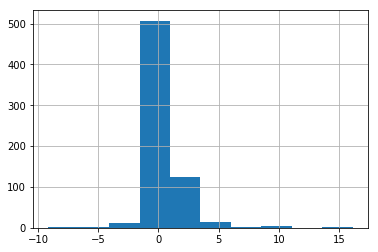

In [18]:
dfStocks2['macd'].hist()

In [4]:
dfStocks2.columns

Index(['id', 'symbol', 'buyflag', 'sellflag', 'open', 'high', 'low', 'close',
       'last', 'tottrdqty', 'tottrdval', 'timestamp', 'days', 'totaltrades',
       'exchangename', 'priceTrend', 'sma_5', 'sma_13', 'sma_26', 'sma_50',
       'sma_200', 'sma_5c13', 'sma_5c26', 'sma_50c200', 'crossDate5c13',
       'crossDate5c26', 'crossDate50c200', 'macd', 'pp', 'rsiTransitStatus',
       'rsiTransitDate', 'rsi', 'signalval', 'cci', 'cciTransitStatus',
       'cciTransitDate', 'histogram', 'sTransitStatus', 'zTransitStatus',
       'sTransitDate', 'zTransitDate', 'stoch_14k', 'stoch_3d', 'symid',
       'exchangeid', 'avgD50Price', 'avgD50vol', 'avgDPrice', 'avgDvol',
       'avgMPrice', 'avgMvol', 'avgWPrice', 'avgWvol', 'd50pmax', 'd50pmin',
       'd50vmax', 'd50vmin', 'dpmax', 'dpmin', 'dvmax', 'dvmin', 'wpmax',
       'wpmin', 'wvmax', 'wvmin', 'mpmax', 'mpmin', 'mvmax', 'mvmin',
       'preClose', 'preVolume', 'transitdate', 'transitFlag', 'updays5',
       'updays20', 'upperc5', 'up

In [ ]:
dfStocks2[['buyflag', 'zTransitDate']]

In [5]:
dfStocks2[dfStocks2['buyflag'] == 2 ].shape

(451, 77)

In [6]:
dfStocks2[dfStocks2['buyflag'] == 1 ].shape

(216, 77)

<b> convert variables into 0 and 1

In [6]:
dfStocks2['buyflag'] = dfStocks2['buyflag'] -1

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(dfStocks2.drop(columns='buyflag', axis=1), dfStocks2['buyflag'], test_size=0.3, random_state=12345)

In [8]:
Y_train[Y_train == 0].shape[0]/ Y_train[Y_train == 1].shape[0]

0.4608150470219436

In [9]:
numCols = dfStocks2.columns[dfStocks2.dtypes != 'object']

In [10]:
objCols = dfStocks2.columns[dfStocks2.dtypes == 'object']

In [11]:
targetCorr = dfStocks2[numCols].corr()['buyflag']

In [12]:
positiveCol = targetCorr[targetCorr > 0.1].index.values

In [13]:
negativeCol = targetCorr[targetCorr < -0.1].index.values

In [14]:
positiveCol

array(['buyflag', 'sTransitStatus'], dtype=object)

In [15]:
negativeCol

array(['tottrdqty', 'sma_200', 'rsi', 'cci', 'avgD50vol', 'avgDvol',
       'avgMvol', 'avgWvol', 'd50vmax', 'dvmax', 'dvmin', 'wvmax',
       'wvmin', 'mvmax', 'mvmin', 'preVolume', 'updays5', 'upperc5',
       'upperc20'], dtype=object)

In [ ]:
targetCorr

In [17]:
import matplotlib.pyplot as plt

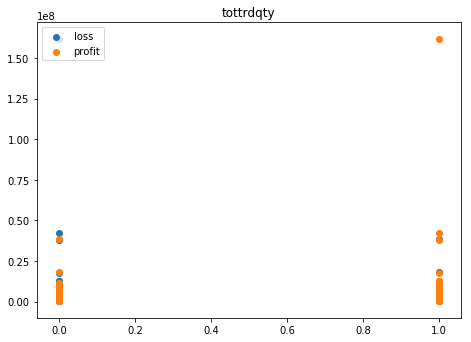

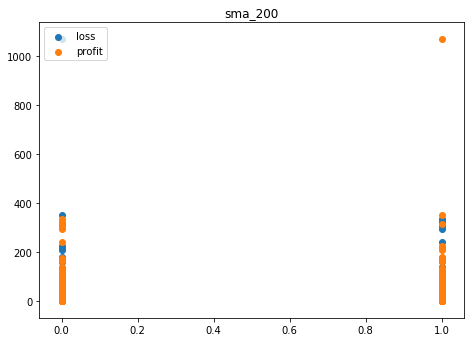

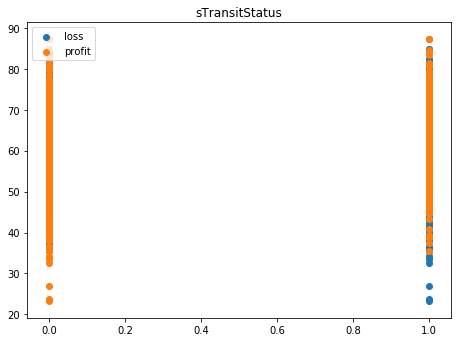

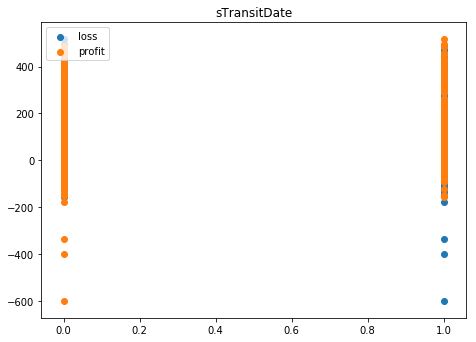

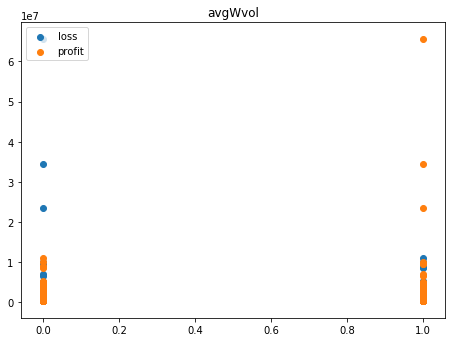

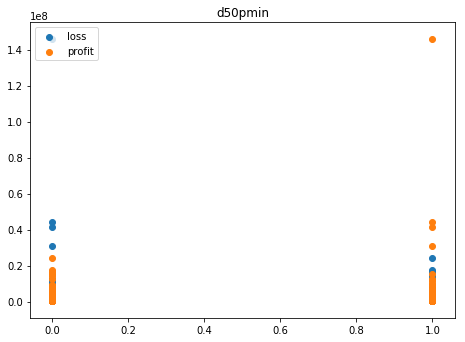

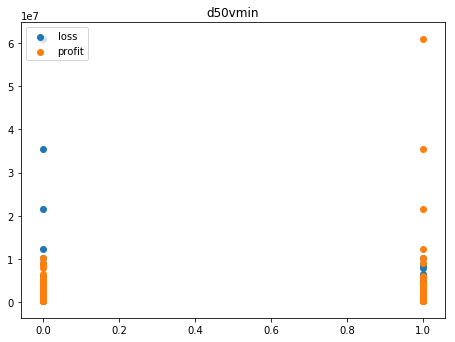

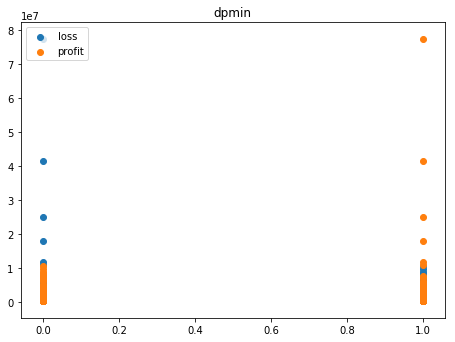

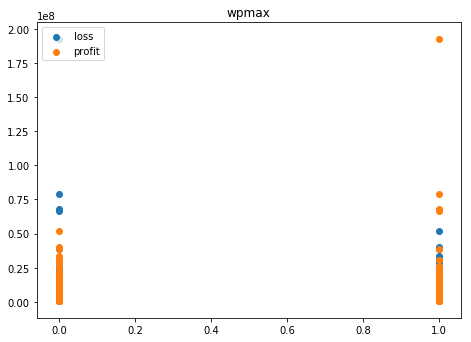

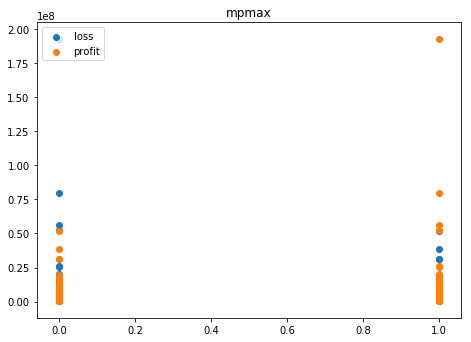

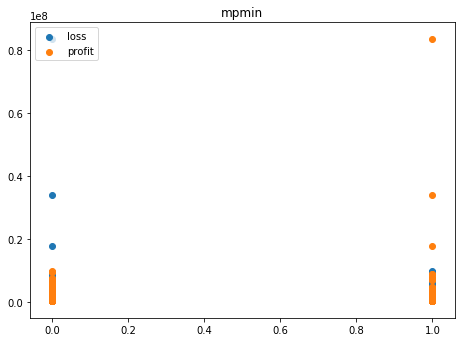

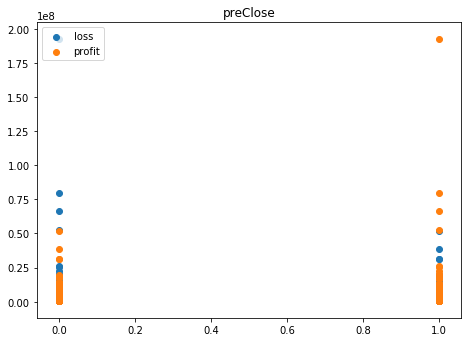

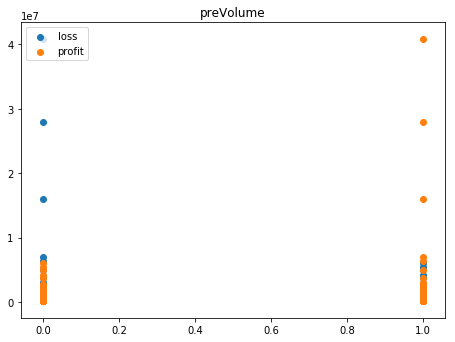

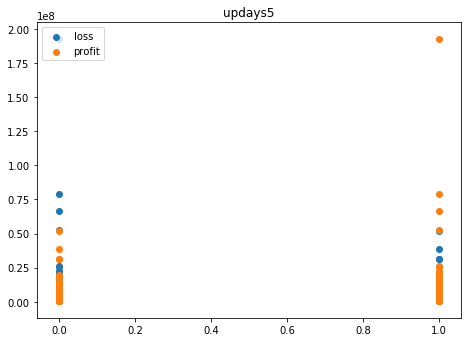

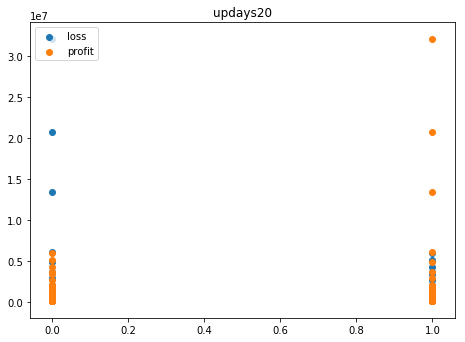

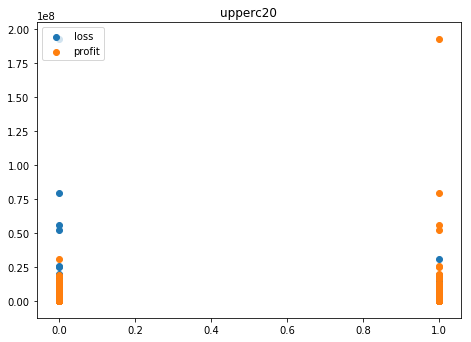

<Figure size 2520x1800 with 0 Axes>

In [18]:
fig = plt.figure(figsize=[35, 25])

for i in range(len(negativeCol)):    
    plt.subplot(4, 4, i+1)
    plt.scatter(dfStocks2['buyflag']==1, dfStocks2[negativeCol[i]], label='loss')
    plt.scatter(dfStocks2['buyflag']==0, dfStocks2[negativeCol[i]], label='profit')
    #dfStocks2[negativeCol[i]].hist()
    plt.legend(loc=2)
    plt.title(negativeCol[i])
    plt.figure(figsize=[35, 25])
    #print(negativeCol[i])
    #plt.show()

In [19]:
# By analyzing scatter plot, it looks like below variables shows good difference
impCols = ['sTransitStatus', 'avgWvol', 'd50pmin', 'preVolume']
# By analyzing histogram, it looks like below are slightly skewed bell shape and rest all are uniform
# For rest all, we may have to use technique like split into bins
impCols3 = ['sTransitStatus', 'sTransitDate']

<b> Lets try discreatizing the data i.e. binning

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
dfStocks2['avgWvol'].describe()

count    6.670000e+02
mean     1.295836e+06
std      3.234236e+06
min      1.756920e+05
25%      3.929920e+05
50%      6.383230e+05
75%      1.298979e+06
max      6.566122e+07
Name: avgWvol, dtype: float64

In [62]:
# transform the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X_binned = enc.fit_transform(dfStocks2[['avgWvol', 'tottrdqty']])

In [67]:
X_binned

<667x20 sparse matrix of type '<class 'numpy.float64'>'
	with 1334 stored elements in Compressed Sparse Row format>

<b> But this didn't show any major improvement, lets try those which are normally distributed

In [40]:
impCols3 = ['sTransitStatus', 'sTransitDate']

In [30]:
dfStocks3 = dfStocks2[impCols3].copy()

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler()
scaler.fit(dfStocks3[impCols3])
Xtransformed = scaler.transform(dfStocks3[impCols3])

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtransformed, dfStocks2['buyflag'], test_size=0.3, random_state=12345)

In [ ]:
X_test

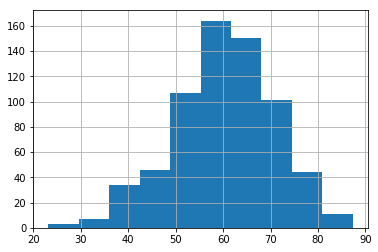

In [36]:
dfStocks3['sTransitStatus'].hist()

In [29]:
dfStocks2[impCols3].corr()

,sTransitStatus,sTransitDate,buyflag
sTransitStatus,1.000000,0.895906,-0.168934
sTransitDate,0.895906,1.000000,-0.141895
buyflag,-0.168934,-0.141895,1.000000


In [66]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()

In [110]:
modelLR = LogisticRegression(penalty='l1', C=100, random_state=12345)

In [111]:
modelLR.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=12345, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
from sklearn.svm import SVR

In [139]:
svr = SVR(kernel='linear', gamma='scale', C=1.0, epsilon=0.2)
svr.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2, gamma='scale',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [140]:

print('accuracy: {}'.format(metrics.accuracy_score(Y_test, Y_pred)))
print('precision: {}'.format(metrics.precision_score(Y_test, Y_pred)))
print('recall: {}'.format(metrics.recall_score(Y_test, Y_pred)))

accuracy: 0.6517412935323383
precision: 0.655
recall: 0.9924242424242424


In [143]:
plotDF = pd.DataFrame(X_test, columns=['First', 'Second'])

In [144]:
plotDF['Classify'] = Y_test

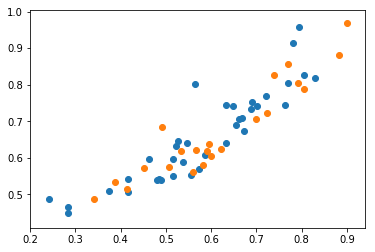

In [151]:
plt.scatter(data=plotDF[plotDF.Classify == 1], x='First', y='Second')
plt.scatter(data=plotDF[plotDF.Classify == 0], x='First', y='Second')

In [ ]:
?dfStocks3.append

In [90]:
dfStocks2.loc[Y_test.index, 'Predicted'] = Y_pred + 1

In [94]:
dfStocks2.to_csv('DecisionPrediction_test.csv')

Decision Tree model during training has accuracy=1.0 , precision=1.0 and recall=1.0
Decision Tree model during testing has accuracy=0.5771144278606966 , precision=0.6715328467153284 and recall=0.696969696969697
**************************************************


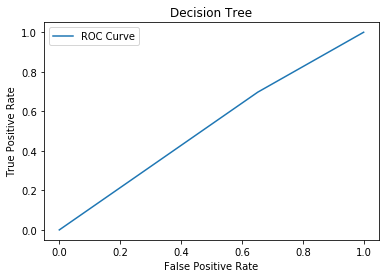

Random Forest model during training has accuracy=1.0 , precision=1.0 and recall=1.0
Random Forest model during testing has accuracy=0.6766169154228856 , precision=0.6892655367231638 and recall=0.9242424242424242
**************************************************


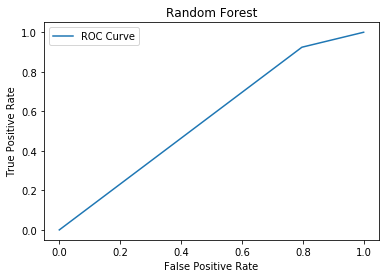

AdaBoost model during training has accuracy=0.776824034334764 , precision=0.7763496143958869 and recall=0.9467084639498433
AdaBoost model during testing has accuracy=0.6467661691542289 , precision=0.6826347305389222 and recall=0.8636363636363636
**************************************************


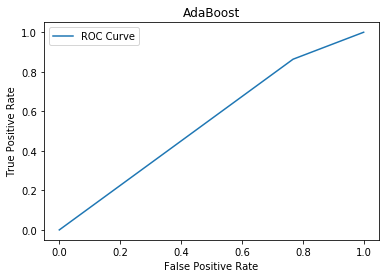

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logisic model during training has accuracy=0.6437768240343348 , precision=0.7018469656992085 and recall=0.8338557993730408
Logisic model during testing has accuracy=0.5422885572139303 , precision=0.625 and recall=0.7575757575757576
**************************************************


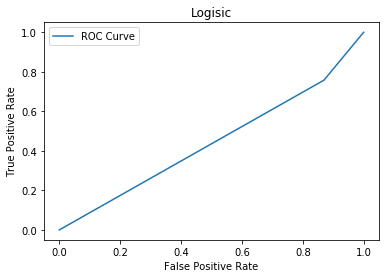

GBM model during training has accuracy=0.8261802575107297 , precision=0.7989949748743719 and recall=0.9968652037617555
GBM model during testing has accuracy=0.6417910447761194 , precision=0.6648351648351648 and recall=0.9166666666666666
**************************************************


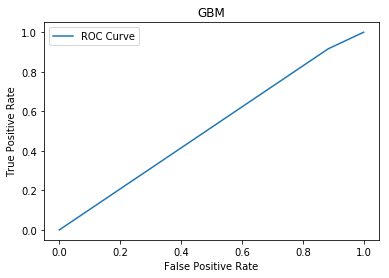

In [17]:
owp.compareModelPerformance(X_train[negativeCol], Y_train, X_test[negativeCol], Y_test)
#owp.compareModelPerformance(X_train, Y_train, X_test, Y_test)

In [18]:
X_test.to_csv('ValidationData.csv')

In [19]:
Y_test.to_csv('ValidationTargetData.csv')

In [64]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from imblearn.combine import SMOTEENN

In [46]:
etc = ExtraTreesClassifier()
etc.fit(dfStocks2[numCols].drop(columns='buyflag'), dfStocks2['buyflag'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [ ]:
temp = pd.DataFrame(data= list(zip(dfStocks2[numCols], etc.feature_importances_)), columns=['cols', 'importance']) 
temp.sort_values(by='importance', ascending=False)

In [51]:
impCols2 = temp.loc[temp.importance > 0.025, 'cols'].values
impCols2

array(['id', 'last', 'tottrdval', 'cciTransitDate', 'zTransitStatus',
       'exchangeid', 'avgDPrice', 'd50vmax', 'upperc5'], dtype=object)

In [54]:
# Lets overwrite
impCols2 = ['last', 'tottrdval', 'cciTransitDate', 'zTransitStatus', 'avgDPrice', 'd50vmax', 'upperc5']

In [25]:
StrFold = StratifiedKFold(n_splits=2, shuffle=True, random_state=12345)

In [ ]:
?plt.contour

In [49]:
#for trainIndex, testIndex in StrFold.split(dfStocks2[impCols3], dfStocks2['buyflag']):
for trainIndex, testIndex in StrFold.split(Xtransformed, dfStocks2['buyflag']):
    model2 = RandomForestClassifier(n_estimators=10, max_depth=12)
    #Xtrain, Xtest, Ytrain, Ytest = train_test_split(X2, Y2, test_size=0.33, random_state=12345)
    Xtrain, Xtest = dfStocks2[impCols3].loc[trainIndex], dfStocks2[impCols3].loc[testIndex]
    Ytrain, Ytest = dfStocks2['buyflag'].loc[trainIndex], dfStocks2['buyflag'].loc[testIndex]
    model2.fit(Xtrain, Ytrain)
    YPredicted = model2.predict(Xtest)
    YPredicted2 = model2.predict(Xtrain)
    print('Train ===> Accuracy: {}, precision: {}, recall: {}'.format(accuracy_score(Ytrain, YPredicted2), precision_score(Ytrain, YPredicted2), recall_score(Ytrain, YPredicted2)))
    print('Test ===> Accuracy: {}, precision: {}, recall: {}'.format(accuracy_score(Ytest, YPredicted), precision_score(Ytest, YPredicted), recall_score(Ytest, YPredicted)))
    #plt.contour(Y_test, YPredicted)
    #fpr, tpr, _ = roc_curve(Ytest, YPredicted)
    #plt.plot(fpr, tpr)
    plt.show()

Train ===> Accuracy: 0.9459459459459459, precision: 0.9591836734693877, recall: 0.8703703703703703
Test ===> Accuracy: 0.6017964071856288, precision: 0.3188405797101449, recall: 0.2037037037037037
Train ===> Accuracy: 0.907185628742515, precision: 0.9873417721518988, recall: 0.7222222222222222
Test ===> Accuracy: 0.6396396396396397, precision: 0.3695652173913043, recall: 0.1574074074074074


In [10]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile, f_classif

In [44]:
varSel = VarianceThreshold(threshold=0.8*(1-0.8))

In [49]:
dfFitVars = varSel.fit_transform(dfStocks2[numCols].drop(columns='buyflag'))

In [91]:
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(dfFitVars, dfStocks2['buyflag'])

SelectPercentile(percentile=50,
         score_func=<function f_classif at 0x000002405386AAE8>)

In [92]:
selector.transform(dfFitVars).shape

(667, 23)

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(selector.transform(dfFitVars), dfStocks2['buyflag'], test_size=0.3, random_state=12345)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

In [54]:
modelDT = DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=8)

In [55]:
modelDT.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [56]:
Y_pred = modelDT.predict(X_test)

In [57]:
metrics.accuracy_score(Y_test, Y_pred)

0.572139303482587

In [58]:
metrics.precision_score(Y_test, Y_pred)

0.6575342465753424

In [59]:
metrics.recall_score(Y_test, Y_pred)

0.7272727272727273

In [60]:
modelRanFor = RandomForestClassifier(n_estimators=100)

In [61]:
modelRanFor.fit(X_train, Y_train)
Y_pred = modelRanFor.predict(X_test)
metrics.accuracy_score(Y_test, Y_pred)

0.6019900497512438

In [62]:
metrics.precision_score(Y_test, Y_pred)

0.6733333333333333

In [63]:
metrics.recall_score(Y_test, Y_pred)

0.7651515151515151

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(dfStocks2[numCols].drop(columns='buyflag', axis=1), dfStocks2['buyflag'], test_size=0.3, random_state=12345)

In [16]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [18]:
Y_pred = clf.predict(X_test)

In [21]:
metrics.accuracy_score(Y_test, Y_pred)

0.6268656716417911

In [22]:
metrics.precision_score(Y_test, Y_pred)

0.42857142857142855

In [23]:
metrics.recall_score(Y_test, Y_pred)

0.2608695652173913

In [ ]:
clf = LinearDiscriminantAnalysis(n_components=5)
clf.fit_transform(X_train, Y_train)

In [40]:
modelDT = DecisionTreeClassifier(max_depth=15, min_samples_leaf=4, min_samples_split=8)

In [41]:
modelDT.fit(clf.fit_transform(X_train, Y_train), Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=8,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
Y_pred = clf.predict(X_test)

In [43]:
metrics.recall_score(Y_test, Y_pred)

0.2608695652173913

In [44]:
metrics.accuracy_score(Y_test, Y_pred)

0.6268656716417911

In [45]:
metrics.precision_score(Y_test, Y_pred)

0.42857142857142855